# Visualization of an ANPCP instance with solution

## ANPCP vs PCP

Let's read a small instance and generate a random solution to plot both.

In [1]:
from random import randint

# randseed = randint(0, 2**31)
randseed = 1957785223
# randseed

In [2]:
DPI = 300

In [11]:
from models.instance import Instance
from models.solver import Solver
from models.plotter import plot_solver

instance = Instance.random(20, 10, seed=randseed)
solver = Solver(instance, 5, 1, True, seed=randseed)
solver.grasp(100, pool_limit=10)
solver.solution

Solution(x(S)=267, S={2, 3, 4, 6, 8}, time=0.3220932999975048, moves=1)

In [ ]:
from models.plotter import Language

lang = Language.SPANISH

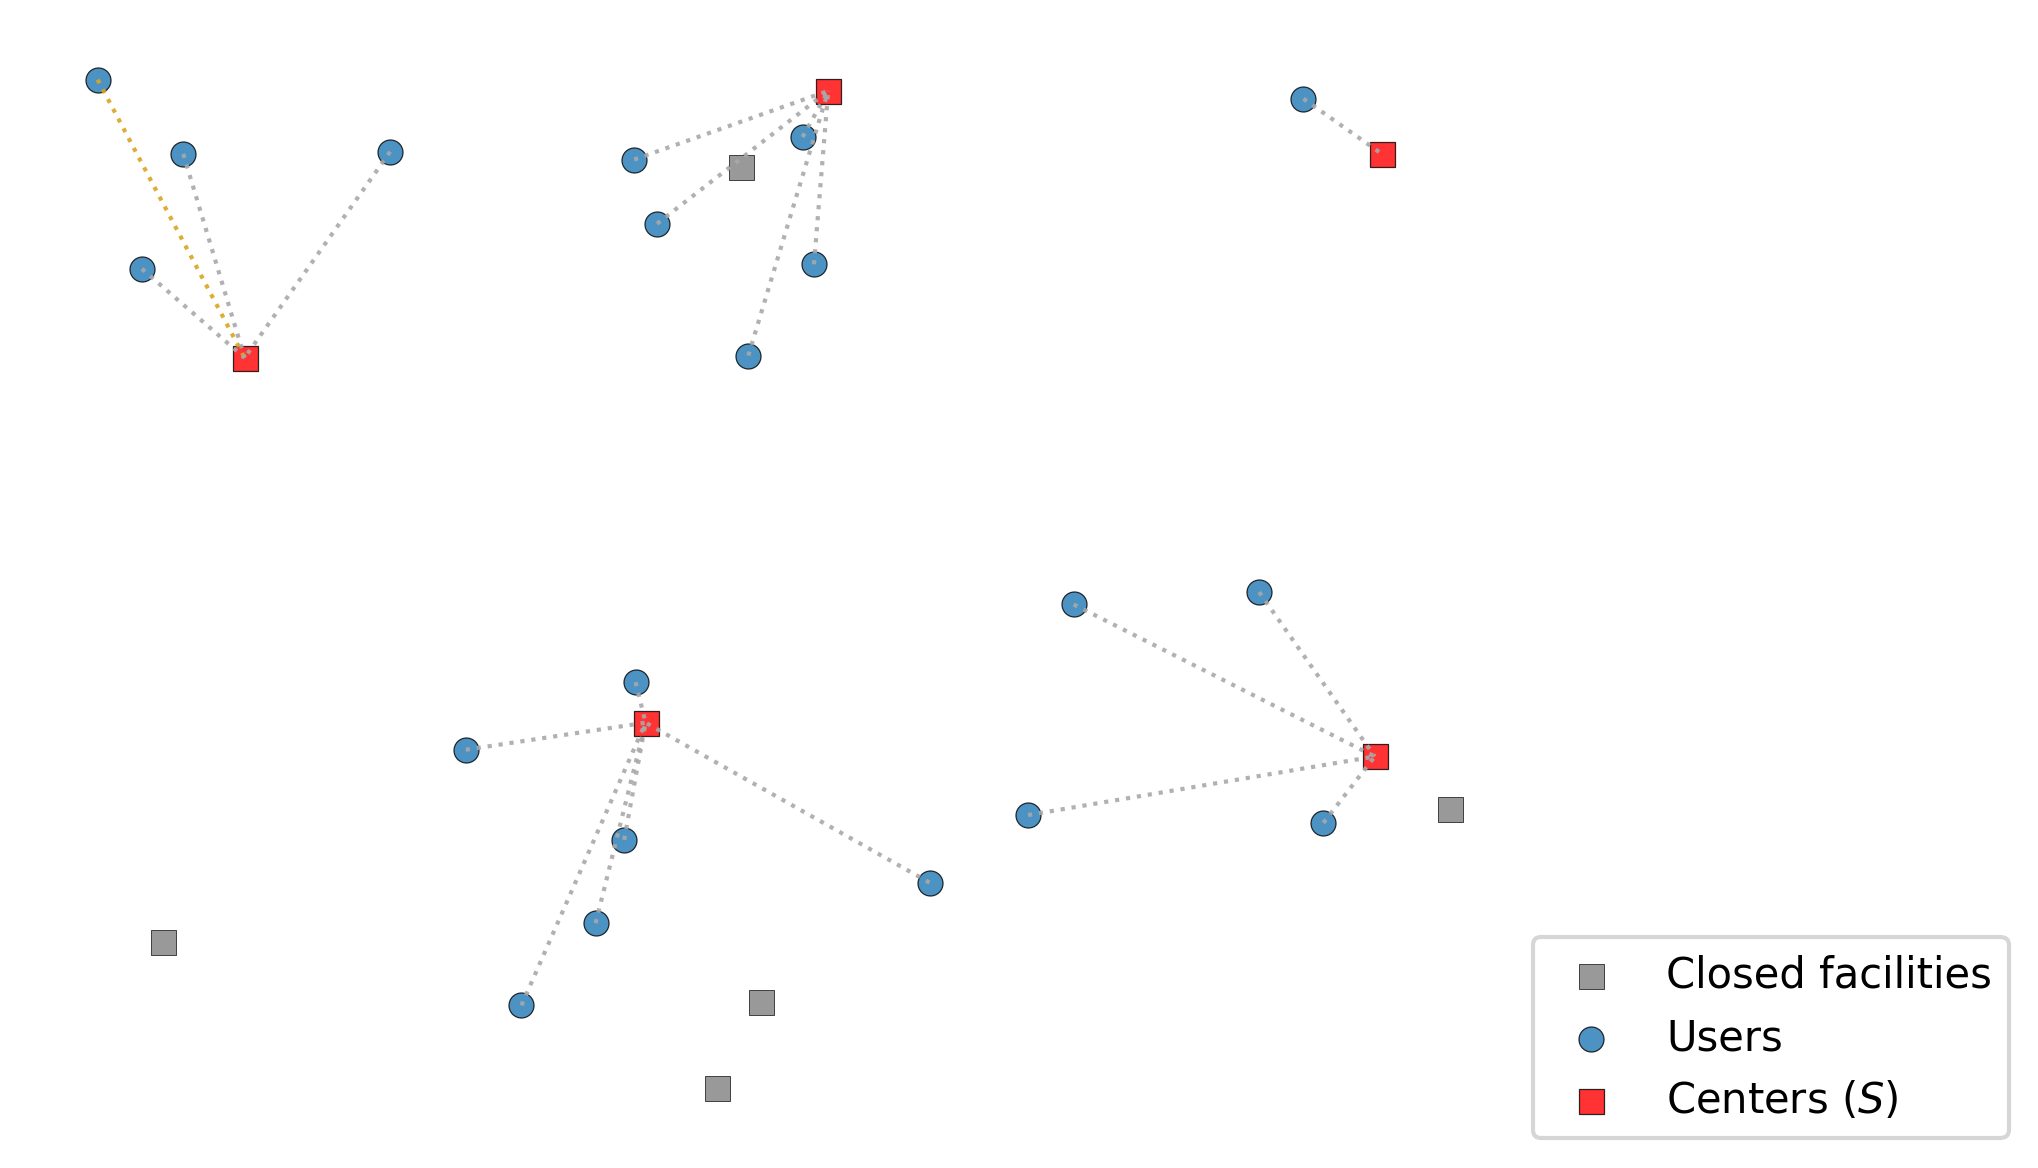

In [4]:
plot_solver(
    solver,
    False,
    dpi=DPI,
    filename="nb_results\\1npcp_opt.png",
    language=lang,
);

Each dotted line represents the assignment between a client and its $\alpha$-th closest facility.
The orange line is the larger distance, which defines the objective function.

In [5]:
solver.reset_alpha(2)
solver.solution

Solution(x(S)=606, S={2, 3, 4, 6, 8}, time=0.20395400002598763, moves=1)

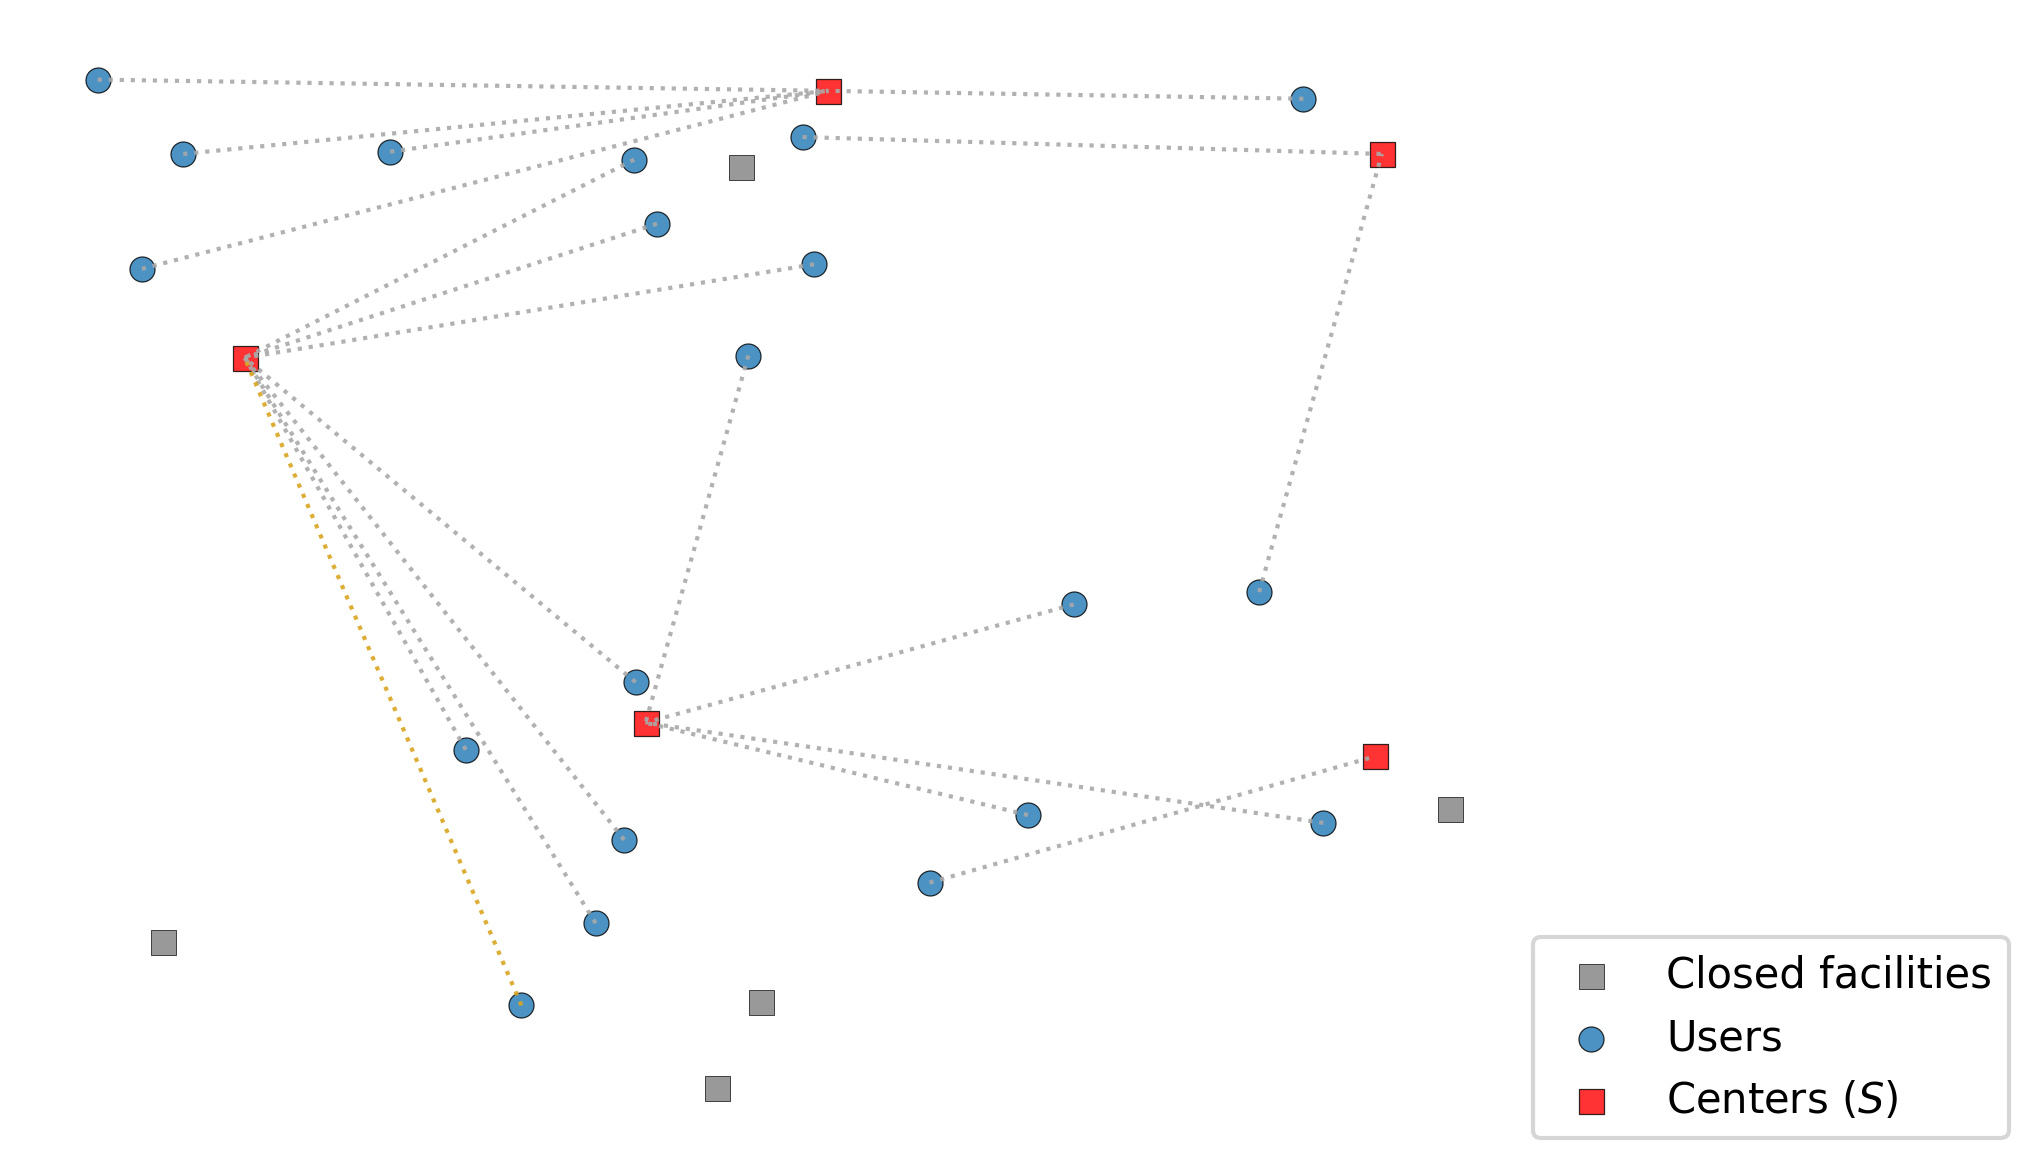

In [6]:
plot_solver(
    solver,
    False,
    dpi=DPI,
    filename="nb_results\\2npcp_same.png",
    language=lang,
);

In [7]:
solver.grasp(100, pool_limit=10)
solver.solution

Solution(x(S)=483, S={2, 3, 5, 6, 7}, time=0.47763690003193915, moves=1)

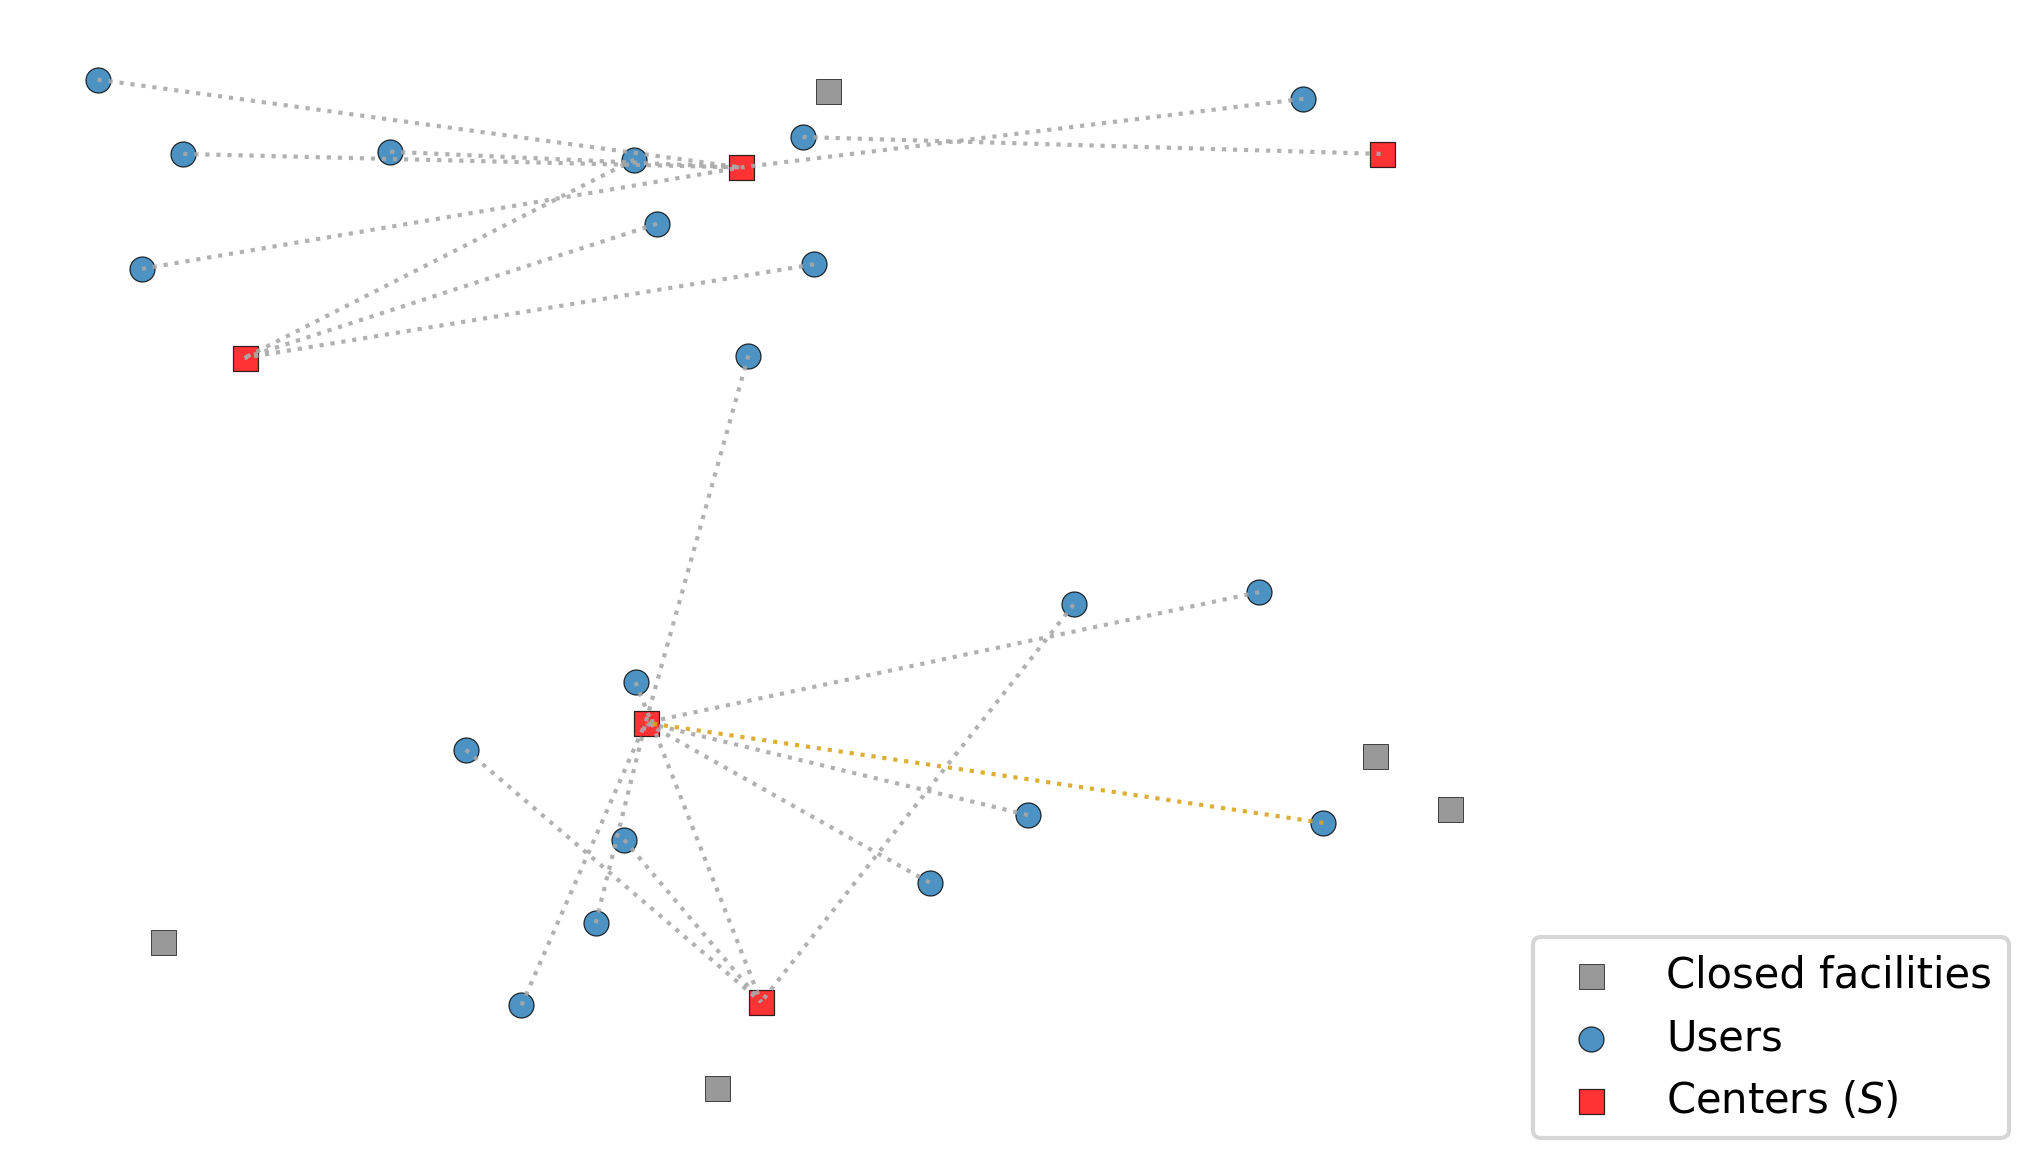

In [8]:
plot_solver(
    solver,
    False,
    dpi=DPI,
    filename="nb_results\\2npcp_opt.png",
    language=lang,
);

In [9]:
solver.reset_alpha(1)
solver.solution

Solution(x(S)=424, S={2, 3, 5, 6, 7}, time=0.47763690003193915, moves=1)

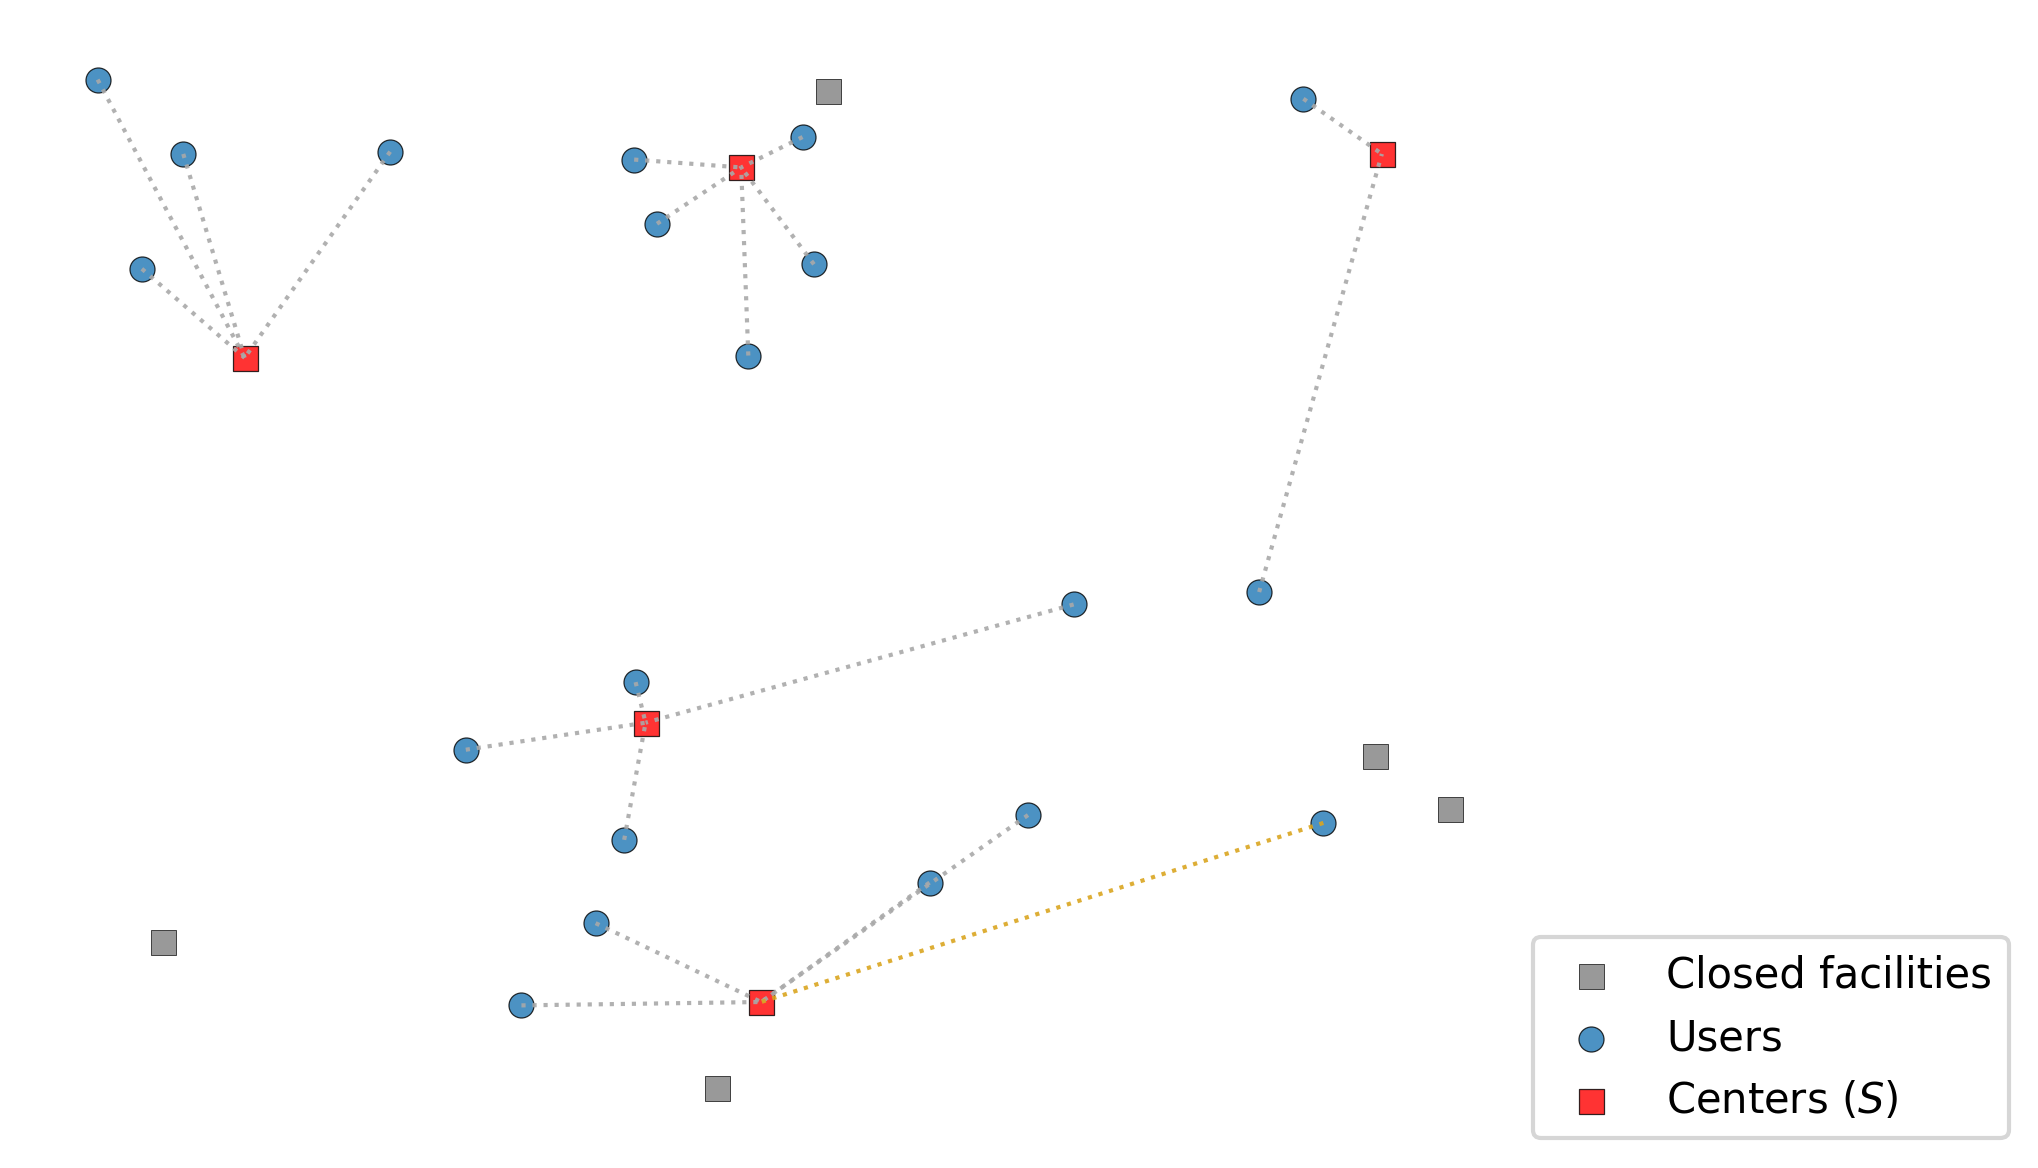

In [10]:
plot_solver(
    solver,
    False,
    dpi=DPI,
    # filename="nb_results\\1npcp.png",
    language=lang,
);

Notice how when $\alpha = 1$, which is the $p$-center problem (PCP), the assignment lines form clusters rather than crossing each other.